"""
案例: 通过KNN算法实现 鸢尾花的 分类操作.

回顾: 机器学习项目的研发流程
    1. 加载数据.
    2. 数据的预处理.
    3. 特征工程(提取, 预处理...)
    4. 模型训练.
    5. 模型评估.
    6. 模型预测.
"""


In [1]:
# 导入工具包
from sklearn.datasets import load_iris                  # 加载鸢尾花测试集的.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   # 分割训练集和测试集的
from sklearn.preprocessing import StandardScaler        # 数据标准化的
from sklearn.neighbors import KNeighborsClassifier      # KNN算法 分类对象
from sklearn.metrics import accuracy_score              # 模型评估的, 计算模型预测的准确率

# 1. 定义函数, 加载鸢尾花数据集, 并查看数据集.

In [3]:
    # 1. 加载鸢尾花数据集.
    iris_data = load_iris()
    # 2. 查看数据集.
    # print(f'数据集: {iris_data}')              # 字典形态
    # print(f'数据集的类型: {type(iris_data)}')   # <class 'sklearn.utils._bunch.Bunch'>
    # 3. 查看数据集所有的键.
    print(f'数据集所有的键: {iris_data.keys()}')
    # 4. 查看数据集的键对应的值.
    # print(f'具体的数据: {iris_data.data[:5]}')            # 有150条数据, 每条数据有4个特征. 我们只看前5条
    # print(f'具体的标签: {iris_data.target[:5]}')          # 有150条数据, 每条数据有1个标签. 我们只看前5条

    print(f'具体的数据: {iris_data.data}')
    print(f'具体的标签: {iris_data.target}')
    print(f'标签对应的名称: {iris_data.target_names}')     # ['setosa' 'versicolor' 'virginica']
    print(f'特征对应的名称: {iris_data.feature_names}')    # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    # print(f'数据集的描述: {iris_data.DESCR}')
    # print(f'数据集的框架: {iris_data.frame}')               # None
    # print(f'数据集的文件名: {iris_data.filename}')             # iris.csv
    # print(f'数据集的模型(在哪个包下): {iris_data.data_module}') # sklearn.datasets.data

数据集所有的键: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
具体的数据: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [

# 2. 定义函数, 绘制数据集的散点图.

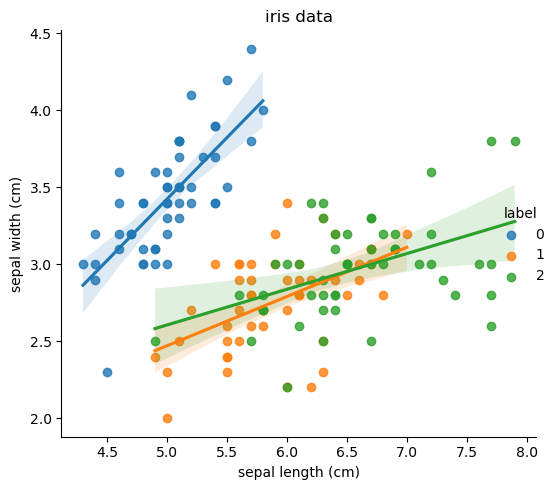

In [5]:

    # 1. 加载数据集.
    iris_data = load_iris()
    # 2. 把 鸢尾花数据集封装成 DataFrame对象.
    iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    # 3. 给df对象新增1列 -> 标签列.
    iris_df['label'] = iris_data.target
    # print(iris_df)

    # 4. 通过 Seaborn绘制散点图.
    # 参1: 数据集. 参2: x轴. 参3: y轴. 参4: 分组字段. 参5: 是否显示拟合线.
    sns.lmplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='label', fit_reg=True)
    # 5. 设置标题, 显式.
    plt.title('iris data')
    plt.tight_layout()      # 自动调整子图参数, 以使整个图像的边界与子图匹配.
    plt.show()

# 3. 定义函数, 切分训练集和测试集.

In [6]:
    # 1. 加载数据集.
    iris_data = load_iris()

    # 2. 数据的预处理: 从150个特征和标签中, 按照 8:2的比例, 切分训练集和测试集.
    # 参1: 特征数据. 参2: 标签数据. 参3: 测试集的比例.  参4: 随机种子(种子一致, 每次生成的随机数据集都是固定的)
    # 返回值: 训练集的特征数据, 测试集的特征数据, 训练集的标签数据, 测试集的标签数据.
    x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=23)

    # 3. 打印切割后的结果.
    print(f'训练集的特征: {x_train}, 个数: {len(x_train)}')     # 120条, 每条4列(特征)
    print(f'训练集的标签: {y_train}, 个数: {len(y_train)}')     # 120条, 每条1列(标签)
    print(f'测试集的特征: {x_test}, 个数: {len(x_test)}')       # 30条, 每条4列(特征)
    print(f'测试集的标签: {y_test}, 个数: {len(y_test)}')       # 30条, 每条1列(标签)

训练集的特征: [[4.9 3.1 1.5 0.1]
 [5.2 2.7 3.9 1.4]
 [5.4 3.9 1.3 0.4]
 [7.7 2.8 6.7 2. ]
 [5.  3.4 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [6.5 2.8 4.6 1.5]
 [5.  2.3 3.3 1. ]
 [5.7 3.  4.2 1.2]
 [6.3 3.3 6.  2.5]
 [6.9 3.2 5.7 2.3]
 [4.8 3.4 1.9 0.2]
 [5.5 2.4 3.7 1. ]
 [4.6 3.2 1.4 0.2]
 [6.3 2.3 4.4 1.3]
 [6.3 2.5 5.  1.9]
 [4.9 2.5 4.5 1.7]
 [7.9 3.8 6.4 2. ]
 [4.9 3.1 1.5 0.2]
 [5.7 2.8 4.1 1.3]
 [7.4 2.8 6.1 1.9]
 [6.2 3.4 5.4 2.3]
 [5.5 4.2 1.4 0.2]
 [6.1 2.6 5.6 1.4]
 [5.4 3.  4.5 1.5]
 [7.  3.2 4.7 1.4]
 [7.7 3.8 6.7 2.2]
 [5.9 3.  4.2 1.5]
 [5.  3.6 1.4 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.  5.  1.7]
 [4.7 3.2 1.6 0.2]
 [5.8 2.6 4.  1.2]
 [5.1 3.3 1.7 0.5]
 [6.4 2.8 5.6 2.1]
 [5.5 2.3 4.  1.3]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [5.8 2.8 5.1 2.4]
 [6.3 2.5 4.9 1.5]
 [4.9 3.6 1.4 0.1]
 [5.  3.4 1.6 0.4]
 [6.3 3.4 5.6 2.4]
 [4.9 3.  1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [6.8 3.  5.5 2.1]
 [5.8 2.7 5.1 1.9]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [5.6 3.  4.1 1.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.2 4.5 1.5]
 [6.

# 4. 定义函数, 实现鸢尾花完整案例 -> 加载数据, 数据预处理, 特征工程, 模型训练, 模型评估, 模型预测.

In [8]:
    # 1. 加载数据集.
    iris_data = load_iris()
    # 2. 数据的预处理, 这里是把150条数据, 按照 8:2的比例, 切分训练集和测试集.
    x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=23)

In [9]:
    # 3. 特征工程(提取, 预处理...)
    # 思考1: 特征提取: 因为源数据只有4个特征列, 且都是我们用的, 所以这里无需做特征提取.
    # 思考2: 特征预处理: 因为源数据的4列特征差值不大, 所以我们无需做特征预处理, 但是, 加入特征预处理会让我们的代码更完善, 所以加入.
    # 3.1 创建标准化对象.
    transfer = StandardScaler()
    # 3.2 对特征列进行标准化, 即: x_train: 训练集的特征数据, x_test: 测试集的特征数据.
    # fit_transform: 兼具fit和transform的功能, 即: 训练, 转换. 该函数适用于: 第一次进行标准化的时候使用. 一般用于处理: 训练集.
    x_train = transfer.fit_transform(x_train)
    # transform: 只有转换. 该函数适用于: 重复进行标准化动作时使用, 一般用于对测试集进行标准化.
    x_test = transfer.transform(x_test)

In [11]:
    # 4. 模型训练.
    # 4.1 创建模型对象.
    estimator = KNeighborsClassifier(n_neighbors=3)
    # 4.2 具体的训练模型的动作.
    estimator.fit(x_train, y_train)     # 传入: 训练集的特征数据, 训练集的标签数据

KNeighborsClassifier(n_neighbors=3)

In [13]:
    # 5. 模型预测.
    # 场景1: 对刚才切分的 测试集(30条) 进行测试.
    # 5.1 直接预测即可, 获取到: 预测结果
    y_pre = estimator.predict(x_test)       # x_test: 测试集的特征数据
    # 5.2 打印预测结果.
    print(f'预测值为: {y_pre}')

    # 场景2: 对新的数据集(源数据150条 之外的数据) 进行测试.
    # 5.1 自定义测试数据集.
    my_data = [[7.8, 2.1, 3.9, 1.6]]
    # 5.2 对数据集进行标准化处理.
    my_data = transfer.transform(my_data)
    # 5.3 模型预测.
    y_pre_new = estimator.predict(my_data)
    print(f'预测值为: {y_pre_new}')

    # 5.4 查看上述数据集, 每种分类的预测概率.
    y_pre_proba = estimator.predict_proba(my_data)
    print(f'(各分类)预测概率为: {y_pre_proba}')         # [[0, 0.66666667, 0.33333333]] -> 0分类的概率, 1分类的概率, 2分类的概率.

预测值为: [2 2 1 0 2 1 0 2 0 1 1 0 2 0 0 1 1 1 2 0 2 0 0 0 2 0 0 2 1 1]
预测值为: [1]
(各分类)预测概率为: [[0.         0.66666667 0.33333333]]


In [14]:
    # 6. 模型评估.
    # 方式1: 直接评分, 基于: 测试集的特征 和 测试集集的标签.
    print(f'正确率(准确率): {estimator.score(x_test, y_test)}')     # 0.9666666666666667

    # 方式2: 基于 测试集的标签 和 预测结果 进行评分.
    print(f'正确率(准确率): {accuracy_score(y_test, y_pre)}')         # 0.9666666666666667

正确率(准确率): 0.9666666666666667
正确率(准确率): 0.9666666666666667
